#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [33]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [89]:
sql = """
SELECT year(hire_date) as year,COUNT(emp_no) as num_hired
FROM employees e 
GROUP BY year(hire_date)
ORDER BY year;
"""

In [13]:
import warnings

warnings.filterwarnings('ignore')

In [61]:
df = pd.read_sql(sql, con)
df

,year,num_hired
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

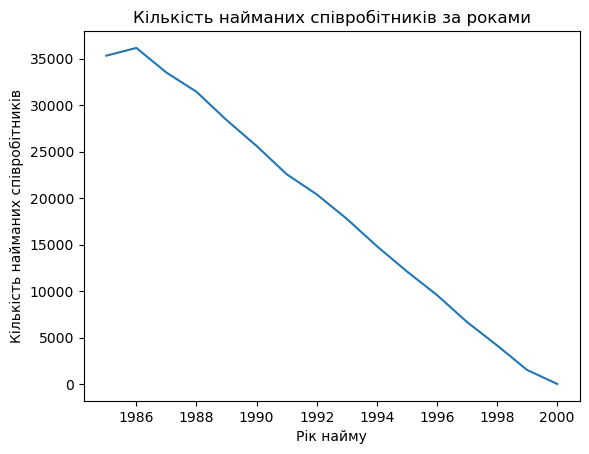

In [91]:
df = pd.read_sql(sql, con)
plt.plot(df.year, df.num_hired)
plt.title('Кількість найманих співробітників за роками')
plt.xlabel('Рік найму')
plt.ylabel('Кількість найманих співробітників');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [79]:
sql = """
SELECT TIMESTAMPDIFF(Year, from_date ,to_date) as duration, from_date, to_date 
FROM titles
Where title ='Engineer' and to_date != '9999-01-01'
"""

In [85]:
df_years = pd.read_sql(sql, con)
df_years

,duration,from_date,to_date
0,9,1986-12-01,1995-12-01
1,5,1990-02-18,1995-02-18
2,8,1992-12-18,2000-12-18
3,8,1987-04-03,1995-04-03
4,5,1995-03-20,2001-03-19
...,...,...,...
84015,9,1989-11-23,1998-11-23
84016,5,1989-07-30,1994-07-30
84017,0,1993-02-22,1993-10-27
84018,6,1996-05-13,2002-05-13


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

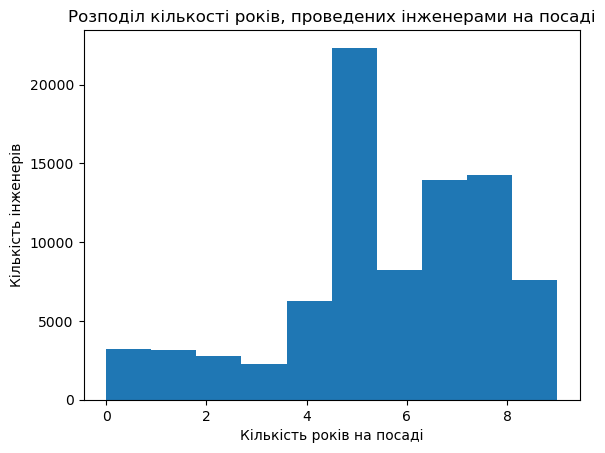

In [99]:
plt.hist(df_years.duration)
plt.title('Розподіл кількості років, проведених інженерами на посаді')
plt.xlabel('Кількість років на посаді')
plt.ylabel('Кількість інженерів');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [101]:
con.close()